<a href="https://colab.research.google.com/github/hyeonjusong410/DL.Basic/blob/main/Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!cp "/content/gdrive/MyDrive/Colab Notebooks/DL_Basic/wikipedia2text-extracted.txt /content/"

In [6]:
from io import IncrementalNewlineDecoder
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def unzip(pairs):
  return tuple(zip(*pairs))

print(unzip(pairs))

(('a', 'b', 'c'), (1, 2, 3))


In [8]:
pairs = (("a", 1), ("b", 2), ("c", 3))
print(f"*pairs : ", *pairs)
print(f"\nzip(*pairs) :")
for item in zip(*pairs):
  print(item)
print(f"\nuntuple(zip(*pairs))")
print(tuple(zip(*pairs)))

*pairs :  ('a', 1) ('b', 2) ('c', 3)

zip(*pairs) :
('a', 'b', 'c')
(1, 2, 3)

untuple(zip(*pairs))
(('a', 'b', 'c'), (1, 2, 3))


In [15]:
path_to_wikipedia = "wikipedia2text-extracted.txt"

with open(path_to_wikipedia, 'rb') as f: # rd : binary read
  wiki = f.read().decode() # bytes -> string
  wiki = wiki.lower() # chaging small letter
print(str(len(wiki)) + " character(s)")

63291831 character(s)


In [16]:
print(wiki[:500])





propaganda is a concerted set of messages aimed at influencing the opinions or behavior of large numbers of people. instead of impartially providing information, propaganda in its most basic sense presents information in order to influence its audience. the most effective propaganda is often completely truthful, but some propaganda presents facts selectively to encourage a particular synthesis, or gives loaded messages in order to produce an emotional rather than rational response to the inf


In [17]:
from collections import Counter

counter = Counter(wiki)
counter

Counter({'\n': 299502,
         'p': 1068764,
         'r': 3309159,
         'o': 3676394,
         'a': 4365050,
         'g': 968743,
         'n': 3740382,
         'd': 1927612,
         ' ': 10016928,
         'i': 3866921,
         's': 3390251,
         'c': 1761449,
         'e': 6091134,
         't': 4456786,
         'f': 1131994,
         'm': 1329206,
         'l': 2137466,
         'u': 1367019,
         'h': 2368877,
         'b': 756941,
         'v': 541205,
         '.': 493636,
         'y': 787683,
         ',': 648939,
         'j': 90804,
         'w': 765023,
         '(': 85894,
         '"': 101906,
         ')': 85956,
         'x': 106384,
         '1': 159377,
         '6': 45971,
         '2': 80685,
         "'": 92082,
         '-': 103163,
         '+': 806,
         '*': 291,
         'q': 52581,
         'z': 66251,
         '’': 3881,
         '‘': 282,
         'k': 293580,
         '0': 152897,
         '—': 8164,
         '?': 1098,
         '/': 

In [19]:
import string

letter = set(string.ascii_lowercase) # selecting small letter

counts = []

for char, cnt in counter.most_common(): #character-count 튜플을 내림차순으로 정렬
  if char in letter:
    counts.append((char, cnt))

print(counts)

[('e', 6091134), ('t', 4456786), ('a', 4365050), ('i', 3866921), ('n', 3740382), ('o', 3676394), ('s', 3390251), ('r', 3309159), ('h', 2368877), ('l', 2137466), ('d', 1927612), ('c', 1761449), ('u', 1367019), ('m', 1329206), ('f', 1131994), ('p', 1068764), ('g', 968743), ('y', 787683), ('w', 765023), ('b', 756941), ('v', 541205), ('k', 293580), ('x', 106384), ('j', 90804), ('z', 66251), ('q', 52581)]


In [23]:
total = 0

for _, cnt in counts:
  total += cnt

freqs = []
for char, cnt in counts:
  freqs.append((char, cnt/total))

print(freqs)
print('\n', total)

[('e', 0.12081350306248849), ('t', 0.08839732126396428), ('a', 0.0865778000521603), ('i', 0.07669774988957738), ('n', 0.07418793482656542), ('o', 0.0729187763358866), ('s', 0.06724332440742638), ('r', 0.06563491970144826), ('h', 0.046985065292301655), ('l', 0.042395185385342864), ('d', 0.03823287392221047), ('c', 0.034937143749573935), ('u', 0.027113892773165053), ('m', 0.0263638976176978), ('f', 0.022452331632454414), ('p', 0.02119820755660234), ('g', 0.019214359000682676), ('y', 0.015623156957763548), ('w', 0.01517371125858898), ('b', 0.015013410281504741), ('v', 0.010734433346062338), ('k', 0.005822959768917474), ('x', 0.002110054336318947), ('j', 0.0018010356252359913), ('z', 0.0013140435576352325), ('q', 0.0010429083984244488)]

 50417659


In [25]:
print(sum(freqs for _, freqs in freqs))

1.0


Text(0.5, 1.0, 'Frequency of Letters in English')

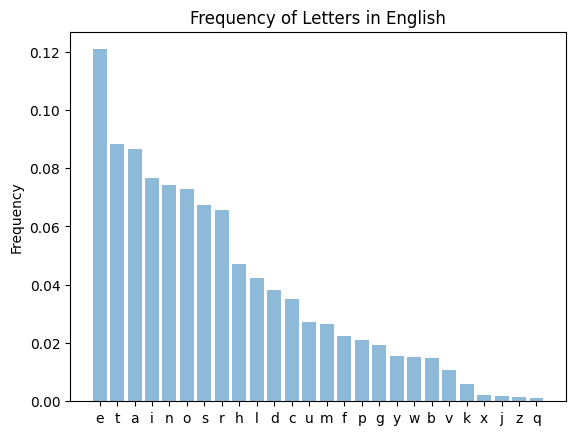

In [28]:
fig, ax = plt.subplots()
labels, values = counts(freqs)

ax.bar(range(26), values, align='center', alpha=0.5)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

ax.set_ylabel('Frequency')
ax.set_title('Frequency of Letters in English')

In [29]:
tokens = wiki.split()
print(len(tokens))
print(tokens[:10])

10124357
['propaganda', 'is', 'a', 'concerted', 'set', 'of', 'messages', 'aimed', 'at', 'influencing']


In [37]:
word_counter = Counter(tokens)

print(len(word_counter))

461681


In [38]:
word_counter = word_counter.most_common()
print(word_counter[:20])

[('the', 782374), ('of', 403206), ('and', 307101), ('in', 268422), ('to', 224263), ('a', 197485), ('is', 107398), ('as', 96039), ('was', 91048), ('by', 76790), ('for', 74871), ('that', 73001), ('with', 68155), ('on', 63819), ('from', 52317), ('are', 51441), ('his', 45043), ('it', 42324), ('at', 39468), ('an', 38318)]
